# Data Description
------------------
The data consists of 48x48 pixel grayscale images of faces.

The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

Dataset contains two columns, "emotion" and "pixels".

The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image.

The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

In [54]:
# NumPy for numerical computing
import numpy as np
import cv2
# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [60]:
df = pd.read_csv("fer2013.csv")

In [58]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [11]:
df.shape

(35887, 3)

<AxesSubplot:xlabel='emotion', ylabel='count'>

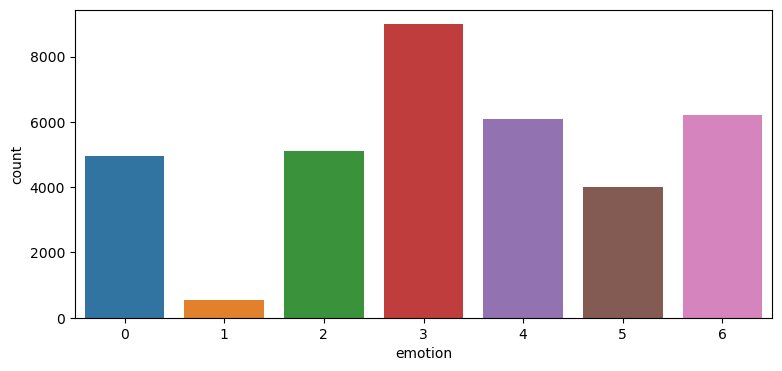

In [12]:


plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [13]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

##### where ** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

<AxesSubplot:xlabel='Usage', ylabel='count'>

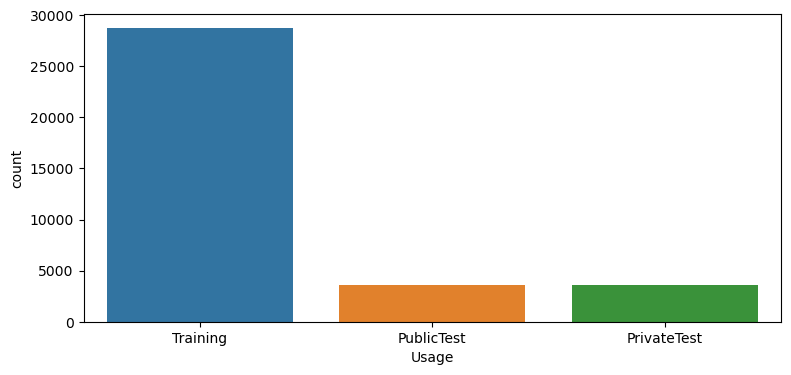

In [14]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [15]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

### PreProcessing

In [16]:
import cv2
image_size=(48,48)

In [17]:
pixels = df['pixels'].tolist() # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
  face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form
  
faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy() #doing the one hot encoding type on emotions

In [50]:
print(faces[0]) #Pixels after preprocessing

[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [18]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [19]:
print(emotions[0]) #Emotion after preprocessing

[1 0 0 0 0 0 0]


In [20]:
print(emotions.shape)
print(emotions.ndim)
print(type(emotions))

(35887, 7)
2
<class 'numpy.ndarray'>


#### Splitting the dataset

In [21]:
#Scaling the pixels between -1 and 1

In [28]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [29]:
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


In [30]:
type(x)

numpy.ndarray

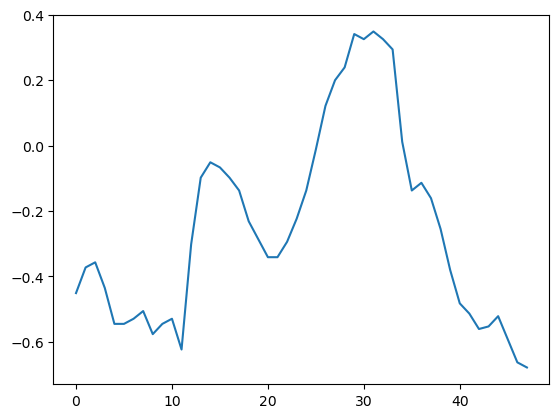

In [25]:
plt.plot(x[0,0])
plt.show()

In [31]:
print(x.min(),x.max()) # we can observe that pixels are scale

-1.0 1.0


In [32]:
#Splitting the dataset into train & validation set

In [33]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [34]:
print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


In [63]:
#Defining Model

In [35]:
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)

2.13.0


In [36]:
from tensorflow import keras

In [37]:
#load the libaray to built the model
import keras
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

### 1) Simpler CNN

In [38]:
input_shape=(48, 48, 1)
num_classes = 7

In [39]:
""" Building up Model Architecture """

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))



In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 16)        64        
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 average_pooling2d (Average  (None, 24, 24, 16)        0

In [40]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7 
patience = 50
base_path = 'C:/Users/hp/Desktop/DIP_project'

In [41]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

### Data Augmentation

In [42]:
""" Data Augmentation => taking the batch and apply some series of random transformations (random rotation, resizing, shearing) 

      ===> to increase generalizability of model  """


# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [59]:
# model parameters/compilation

""" CONFIGURATION ==>.compile(optimizer, loss , metrics) """



model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 16)        64        
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 average_pooling2d (Average  (None, 24, 24, 16)        0

In [47]:
datasets = ['fer2013']
num_epochs = 30
base_path="C:/Users/hp/Desktop/DIP_project"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)
    
    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.hdf5'      # if error "acc" in 1 line ... don't confuse check entire block since fit() generates a inner loop
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1
                        ,callbacks=my_callbacks,validation_data =val_data)   #not callbacks = [my_callbacks] since we my_callbacks is already a list 

Training dataset: fer2013


C:\Users\hp\AppData\Local\Temp\ipykernel_7000\461545433.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(data_generator.flow(train_faces, train_emotions,


Epoch 1/30
898/898 [==============================] - ETA: 0s - loss: 1.7832 - accuracy: 0.2813
Epoch 1: val_loss improved from inf to 1.76029, saving model to C:/Users/hp/Desktop\DIP_projectfer2013simple_cnn.01-1.76.hdf5


C:\Users\hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - 429s 473ms/step - loss: 1.7832 - accuracy: 0.2813 - val_loss: 1.7603 - val_accuracy: 0.3314 - lr: 0.0010
Epoch 2/30
898/898 [==============================] - ETA: 0s - loss: 1.6558 - accuracy: 0.3464
Epoch 2: val_loss improved from 1.76029 to 1.56911, saving model to C:/Users/hp/Desktop\DIP_projectfer2013simple_cnn.02-1.57.hdf5
898/898 [==============================] - 397s 442ms/step - loss: 1.6558 - accuracy: 0.3464 - val_loss: 1.5691 - val_accuracy: 0.3873 - lr: 0.0010
Epoch 3/30
898/898 [==============================] - ETA: 0s - loss: 1.5991 - accuracy: 0.3726
Epoch 3: val_loss improved from 1.56911 to 1.48248, saving model to C:/Users/hp/Desktop\DIP_projectfer2013simple_cnn.03-1.48.hdf5
898/898 [==============================] - 1646s 2s/step - loss: 1.5991 - accuracy: 0.3726 - val_loss: 1.4825 - val_accuracy: 0.4326 - lr: 0.0010
Epoch 4/30
898/898 [==============================] - ETA: 0s - loss: 1.5461 - accuracy: 0.3956
Epoch 4: v

Epoch 26/30
898/898 [==============================] - ETA: 0s - loss: 1.2909 - accuracy: 0.5068
Epoch 26: val_loss improved from 1.15861 to 1.14839, saving model to C:/Users/hp/Desktop\DIP_projectfer2013simple_cnn.26-1.15.hdf5
898/898 [==============================] - 368s 410ms/step - loss: 1.2909 - accuracy: 0.5068 - val_loss: 1.1484 - val_accuracy: 0.5557 - lr: 0.0010
Epoch 27/30
898/898 [==============================] - ETA: 0s - loss: 1.2855 - accuracy: 0.5092
Epoch 27: val_loss improved from 1.14839 to 1.14671, saving model to C:/Users/hp/Desktop\DIP_projectfer2013simple_cnn.27-1.15.hdf5
898/898 [==============================] - 369s 411ms/step - loss: 1.2855 - accuracy: 0.5092 - val_loss: 1.1467 - val_accuracy: 0.5584 - lr: 0.0010
Epoch 28/30
898/898 [==============================] - ETA: 0s - loss: 1.2789 - accuracy: 0.5125
Epoch 28: val_loss improved from 1.14671 to 1.13217, saving model to C:/Users/hp/Desktop\DIP_projectfer2013simple_cnn.28-1.13.hdf5
898/898 [===========

# keras

callbacks => an object that can perform actions at various stages of training
1. write tensorflowboard logs after every batch
2. periodically save model to disk
3. do early stopping 
4. view on internal states and statistics during training
* used in fit() loop
CSVLogger(filename, separator=",') --> to save epoch results to a csv file
create obj and use that obj in fit(callbacks=[csv_logger_obj])
EarlyStopping() --> stop training when a monitored metric has stopped improving
monitor = "val_loss" --> loss function to be monitored
min_delta --> minimum change to count(threshold)
patience --> no of epochs with no improvement to stop training
ReduceLROnPlateau()--> reduce learning rate when metric has stopped improving
monitor, patience, min_delta
factor = 0.1 ==> learning rate reduced to 10% (lr*0.1)
verbose ==> 0: quiet , 1: update msgs
ModelCheckpoint() -->to save keras model or model weights at some frequency
filepath
monitor --> val_acc or val_loss
save_best_only = True
fit_generator(.flow(X,y, batchsize), verbose,epochs,validation_data)

fit() ==> training loop
logs ==> dict

In [61]:
#evaluate() returns [loss,acc]
score = model.evaluate(val_x, val_y, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


225/225 [==============================] - 11s 45ms/step - loss: 1.1338 - accuracy: 0.5713
Test loss: 1.1337981224060059
Test accuracy: 57.13290572166443


##### history ====> default callbacks that is registered when training

    1.  records training metrics for each epoch
    2. these metrics stored in dictionary in history member of object returned
    3. obj returns from calls to fit() used to train model 
    4. data collected in history obj  used to create plots

In [62]:
""" metrics collected by history object """
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [63]:
print(history_dict["accuracy"])

[0.2813403606414795, 0.34640705585479736, 0.37263575196266174, 0.39559024572372437, 0.415200799703598, 0.4333484172821045, 0.4418475031852722, 0.45299383997917175, 0.45898500084877014, 0.4619109034538269, 0.47229093313217163, 0.4780034124851227, 0.4821832776069641, 0.48789578676223755, 0.4926677942276001, 0.4913790225982666, 0.49576789140701294, 0.4919711649417877, 0.5007140636444092, 0.5015848875045776, 0.5036399960517883, 0.5034658312797546, 0.5076805353164673, 0.5058692693710327, 0.5066355466842651, 0.50677490234375, 0.5091782808303833, 0.5124525427818298, 0.5121042132377625, 0.5122435688972473]


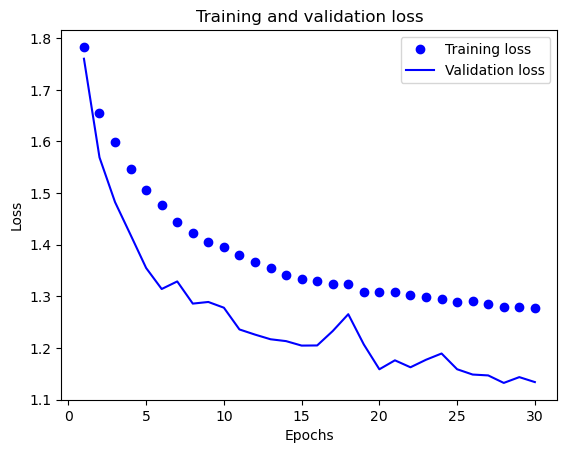

In [64]:
""" Visualising model training history """

import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

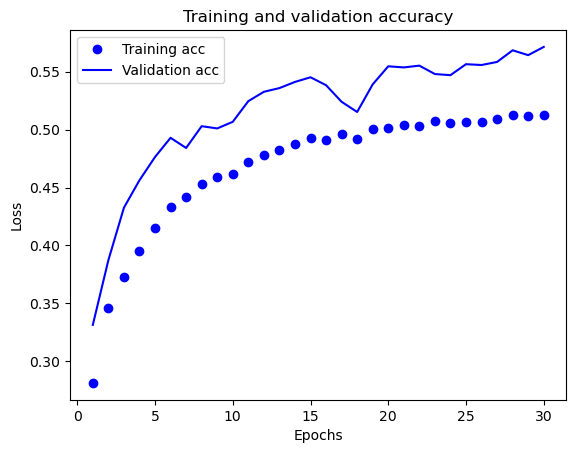

In [65]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####Testing the model on some images

In [67]:
emotion_dict = {0: "Neutral", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }

In [68]:
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [147]:
#from google.colab.patches import cv2_imshow
import cv2

def _predict(path):
  facecasc = cv2.CascadeClassifier('C:/Users/hp/Desktop/DIP_project/haarcascade_frontalface_default.xml')
  imagePath = 'C:/Users/hp/Desktop/DIP_project/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                              #if text is not apeared , change coordinates. it may work
  
 # cv2_imshow(image)
!pip install Pillow
from PIL import Image


# Open the image using Pillow


No of faces :  1
1/1 [==============================] - 0s 37ms/step
person  1  :  Neutral --> 😐


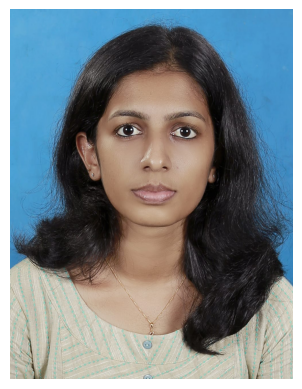

In [152]:
_predict("images\pic1.jpeg")
image = Image.open("images\pic1.jpeg")

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

No of faces :  1
1/1 [==============================] - 0s 47ms/step
person  1  :  Surprised --> 😲


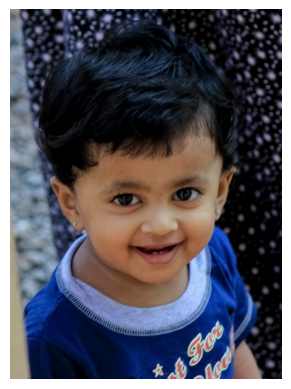

In [158]:
_predict("images\pic6.jpeg")
image = Image.open("images\pic6.jpeg")

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

No of faces :  1
1/1 [==============================] - 0s 32ms/step
person  1  :  Neutral --> 😐


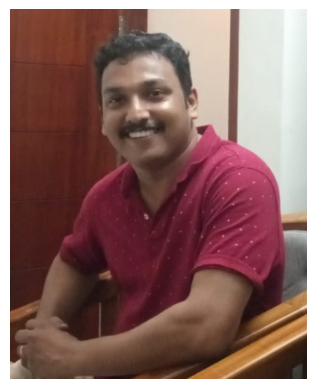

In [186]:
_predict("images\pic11.jpg")
image = Image.open("images\pic11.jpg")

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [1]:
_predict("images\pic11.jpg")
image = Image.open("images\pic11.jpg")

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

NameError: name '_predict' is not defined